# Общая структура датасета

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#!pip install ydata-profiling


Ознакомимся с данными

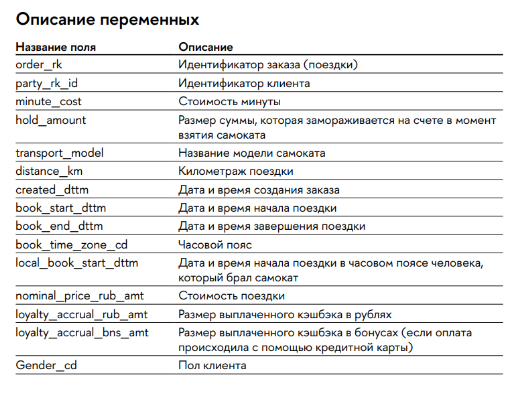

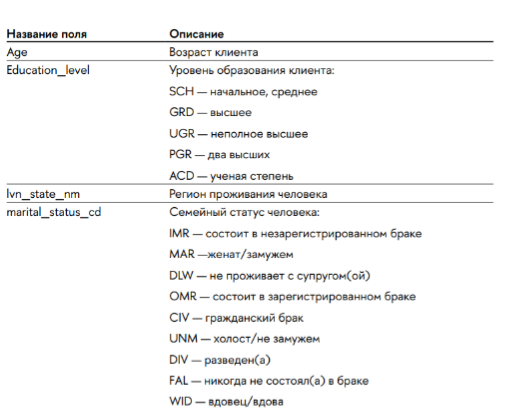

In [ ]:
df = pd.read_csv('https://dano.hse.ru/mirror/pubs/share/987942268.csv')
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [ ]:
# узнаем размеры
shape_of_df = df.shape
print(f"Датасет содержит:\n{shape_of_df[0]} строк\n{shape_of_df[1] } столбцов")

Датасет содержит:
396749 строк
20 столбцов


In [ ]:
# проверим, где содержаться пропуски и узнаем типы данных полей
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

# Предварительная очистка данных

Заметим, что пропуски полностью отсутсвуют в 14 столбцах. Пропуски в данных есть в столбцах:
*   gender_cd (Пропущено менее 1 % от всех данных)
*   education_level_cd (Пропущено около 52 % от всех данных)
*   marital_status_cd (Пропущено около 45 % от всех данных)
*   lvn_state_nm (Пропущено около 8.5 % от всех данных)
*   loyalty_accrual_rub_amt (Пропущено около 7.5 % от всех данных)
*   loyalty_accrual_bns_amt (Пропущено около 94 % от всех данных)




Попытаемся максимально избавиться от пропусков в данных

In [ ]:
df

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,E,1.555069,2024-09-25 11:39:42.000000,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,Max,2.270902,2024-09-24 20:05:43.000000,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,E,1.411171,2024-09-03 16:07:43.000000,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,1.002400,2024-09-12 18:28:48.000000,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN


## Заполнение пропусков

### Заполнение пропусков в столбце gender_cd (пол)

<Axes: xlabel='count', ylabel='gender_cd'>

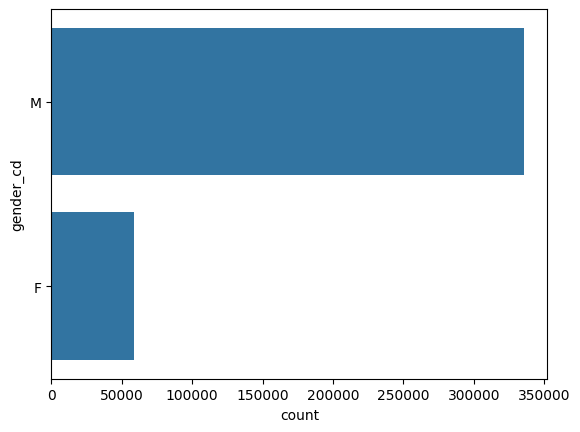

In [ ]:
sns.countplot(df['gender_cd'])

Поскольку в поле gender_cd пропущено меньше 1 % данных, можно заменить пропуски на меру центральной тенденции.
Найдем долю мужичн и женщин и в соответствии с этим заполним пропуски


In [ ]:
probability_to_be_a_male = len(df['gender_cd'][df['gender_cd'] == 'M']) / 393828 # примерно 85%
# Заполняем NaN значения с вероятностью 85% на 'M' и 15% на 'F'
mask = df['gender_cd'].isna()
n_missing = mask.sum()
# Генерируем случайные значения с заданной вероятностью
fill_values = np.random.choice(['M', 'F'], size=n_missing, p=[probability_to_be_a_male, 1-probability_to_be_a_male])
df.loc[mask, 'gender_cd'] = fill_values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                396749 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

<Axes: xlabel='count', ylabel='gender_cd'>

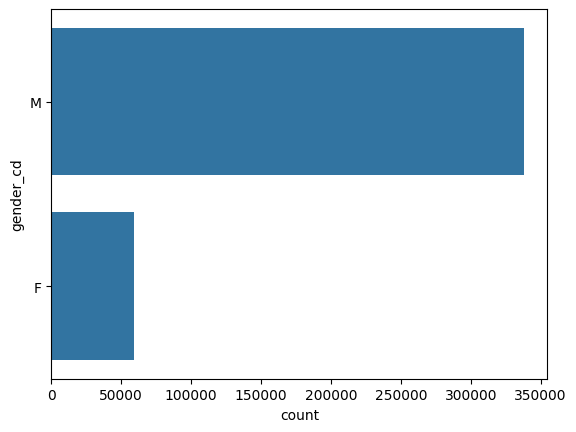

In [ ]:
sns.countplot(df['gender_cd'])

Заметим, что глобально ничего не изменилось в распределении

### Заполнение пропусков в education_level_cd (уровень образования)

Удаление строк приведет к потере почти половины данных ( около 52%), что нежелательно. Введем категорию 'Unknown', сохранив информацию о наличии пропусков

In [ ]:
df['education_level_cd'].fillna("Unknown level", inplace=True)

df['education_level_cd'].unique()

<ipython-input-9-d2ab76499ce0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_level_cd'].fillna("Unknown level", inplace=True)


array(['UGR', 'GRD', 'Unknown level', 'SCH', 'PGR', 'ACD'], dtype=object)

### Заполнение пропусков в marital_status_cd ( cемейный статус )

По той же причине введем категорию 'Unknown'

In [ ]:
df['marital_status_cd'].fillna('Unknown status', inplace=True)
df['marital_status_cd'].unique()

<ipython-input-10-a8490ad85469>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital_status_cd'].fillna('Unknown status', inplace=True)


array(['DIV', 'MAR', 'UNM', 'Unknown status', 'CIV', 'WID'], dtype=object)

### Заполнение пропусков в столбце lvn_state_nm ( регион проживания человека)

Отсутствие региона могло быть вызвано тем, что в некторых ситуациях просиходили сбои. Если бы у этого человека были другие поездки, и там город сохранился, можно было бы заполнить пропуски теми городами, что были сохранены у этого пользователя.

Проверим эту идею

In [ ]:
groupped = df[['party_rk', 'lvn_state_nm']].groupby('party_rk') # сгруппируем регион проживания по пользователям

for u in groupped:
    if pd.isna(((((u)[1]['lvn_state_nm'].to_list())))).any(): # все города для id каждого пользователя переводим в список, и если есть хоть один пропуск выводи данные
      print(u[0])
      print((u)[1]['lvn_state_nm'].to_list())
      print('------')
      print()



Выходные данные были обрезаны до нескольких последних строк (5000).
1043668221
[nan, nan]
------

1043758684
[nan, nan, nan, nan, nan, nan, nan]
------

1043777687
[nan, nan, nan]
------

1043801436
[nan, nan]
------

1043836849
[nan, nan, nan, nan, nan, nan]
------

1043881351
[nan]
------

1044170487
[nan, nan, nan, nan, nan, nan]
------

1044383575
[nan]
------

1044434287
[nan, nan, nan, nan, nan, nan, nan, nan, nan]
------

1044543066
[nan]
------

1044544235
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
------

1044582061
[nan]
------

1044644428
[nan]
------

1044689588
[nan]
------

1044744127
[nan]
------

1044752850
[nan]
------

1044768397
[nan]
------

1044768937
[nan, nan]
------

1044770066
[nan]
------

1044866868
[nan]
------

1044882697
[nan]
------

1044911085
[nan]
------

1044914040
[nan]
------

1044949

Заметим, что нет таких ситуаций, где регион чаще всего встречается у клиента с тем же party_rk_id. Гипотеза опровергнута

Создадим категорию "Неизвестный ргеион" для пропусков. Их не так много и это не несет за собой потерю информации

In [ ]:
df['lvn_state_nm'].fillna("Неизвестный регион", inplace=True)

<ipython-input-12-7ace26158e63>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lvn_state_nm'].fillna("Неизвестный регион", inplace=True)


### Заполнение пропусков в loyalty_accrual_rub_amt  (размер кэшбэка в рублях)

In [ ]:
df[df['loyalty_accrual_rub_amt'] < 0 ]['loyalty_accrual_rub_amt']

,loyalty_accrual_rub_amt
133193,-33.52
218430,-67.83
225743,-8.08
272310,-65.29
297741,-30.62
299220,-5.00
340555,-161.94


Заметим, что есть отрицательный кэшбэк. Можно предположить, что это отмена ранее начисленного кашбэка из-за отмены поездки, но в таком случае были бы пропуски в данных о зваершении поездки.

In [ ]:
percentage_of_less_than_0 = len(df[df['loyalty_accrual_rub_amt']< 0]) / 366992 * 100
print(f"Отрциательные значения составляют {round(percentage_of_less_than_0, 3)} % от заполненных данных")


Отрциательные значения составляют 0.002 % от заполненных данных


Поскольку таких значений очень мало и непонятно, является ошибкой минус или все число, заменим такие значения на меру центральной тенденции


In [ ]:
# Заменяем отрицательные значения на мединау
df.loc[df['loyalty_accrual_rub_amt'] < 0, 'loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].median()



Логично заменить Nan на 0, ведь с выоской долей вероятности это равнозначно отсутствию кэшбэка

In [ ]:
df['loyalty_accrual_rub_amt'].fillna(0, inplace=True)

<ipython-input-16-af07c2eb7d35>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loyalty_accrual_rub_amt'].fillna(0, inplace=True)


### Заполнение пропусков в loyalty_accrual_bns_amt ( кэшбэк в бонусах)

Хоть и пропуск 94% данных является критическим, здесь имеет смысл заменить Nan на 0, тк логично предположить, что пропуск свидетельствует о том, что пользователь не использовал кредитную карту и, соответственно, получил 0 бонусов

In [ ]:
df['loyalty_accrual_bns_amt'].fillna(0, inplace=True)

<ipython-input-17-277d350581ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loyalty_accrual_bns_amt'].fillna(0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                396749 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       396749 non-null  object 
 5   marital_status_cd        396749 non-null  object 
 6   lvn_state_nm             396749 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

**В данных больше нет пропусков!**

## Работа с типами данных

Столбцы created_dttm, book_start_dttm, book_end_dttm, local_book_start_dttm имеют тип данных object, хотя это дата

In [ ]:
df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                396749 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       396749 non-null  object        
 5   marital_status_cd        396749 non-null  object        
 6   lvn_state_nm             396749 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

## Создание дополнительных столбцов


Создадим столбец с длительностью поездки

In [ ]:
df['trip_duration_in_minutes'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() /60

Создадим столбец с датой и временем начала поездки в часовом поясе человека, который брал самокат

In [ ]:
df['local_book_end_dttm'] = df['book_end_dttm'] + pd.to_timedelta(df['book_time_zone_cd'], unit='h')

In [ ]:
df

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_in_minutes,local_book_end_dttm
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,20.500238,2024-08-07 15:07:59.339524
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,6.913893,2024-10-17 18:04:19.419607
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,6.844806,2024-09-19 10:41:50.164372
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,2.309382,2024-10-04 19:07:31.724918
4,258647149,238473615,M,34,Unknown level,Unknown status,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,10.090489,2024-07-10 10:07:48.446462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,Unknown level,Unknown status,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,...,2024-09-25 11:39:42,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,0.0,5.911005,2024-09-25 16:45:41.545313
396745,348829245,1146263947,M,23,Unknown level,Unknown status,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,...,2024-09-24 20:05:43,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,0.0,8.193971,2024-09-24 22:13:58.592279
396746,273529251,1012601147,M,20,Unknown level,Unknown status,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,...,2024-09-03 16:07:43,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,0.0,20.369977,2024-09-03 19:28:07.510118
396747,306062051,863877659,M,19,Unknown level,Unknown status,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,...,2024-09-12 18:28:48,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,0.0,3.541847,2024-09-12 21:32:22.911827


# Анализ данных

## Анализ спроса по времени суток

Для начала посмотрим на распределение поездок по времени с учетом часового пояса пользователя

Распределение по времени суток:
hour_of_day
0      2374
1      1864
2      2372
3      5923
4     15981
5     25528
6     20437
7     15726
8     14861
9     16635
10    18012
11    18354
12    19120
13    22005
14    28733
15    34591
16    32148
17    26718
18    22714
19    19063
20    14301
21    10021
22     5812
23     3456
Name: count, dtype: int64


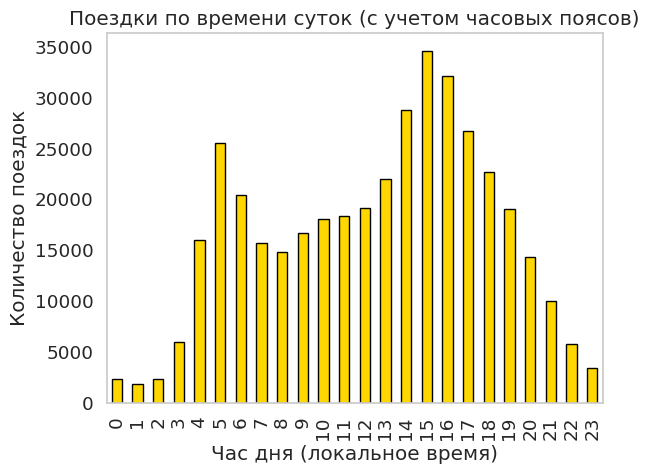

In [ ]:
# Извлекаем час из локального времени
df['hour_of_day'] = df['local_book_start_dttm'].dt.hour

# Распределение по часам
hourly_dist = df['hour_of_day'].value_counts().sort_index()
print("Распределение по времени суток:")
print(hourly_dist)

# Визуализация с черным контуром
hourly_dist.plot(kind='bar',
                 title='Поездки по времени суток (с учетом часовых поясов)',
                 color='gold',
                 edgecolor='black')  # Добавляем черный контур
plt.xlabel('Час дня (локальное время)')
plt.ylabel('Количество поездок')
plt.grid(False)
plt.show()

Заметим, что в данных есть два пика. Один из них, как это ни странно в 5 часов утра.

Посмотрим, в каких городах это более распространенно

In [ ]:
df[df['hour_of_day'] == 5].groupby('lvn_state_nm').size().sort_values(ascending=False)

,0
lvn_state_nm,
Г МОСКВА,6605
Г САНКТ-ПЕТЕРБУРГ,2942
МОСКОВСКАЯ ОБЛ,2801
СВЕРДЛОВСКАЯ ОБЛ,2239
Неизвестный регион,1964
...,...
МОСКОВСКАЯ ОБЛ.,1
ОБЛ ТВЕРСКАЯ,1
ОБЛ САМАРСКАЯ,1


Можно преположожить что в такое раннее время сотрудники доставляют самокаты до нужных точек, проверяют и т.п. Посмотрим отличается ли распределение образования у тех, кто начинал поездку в 6-м часу и у всех

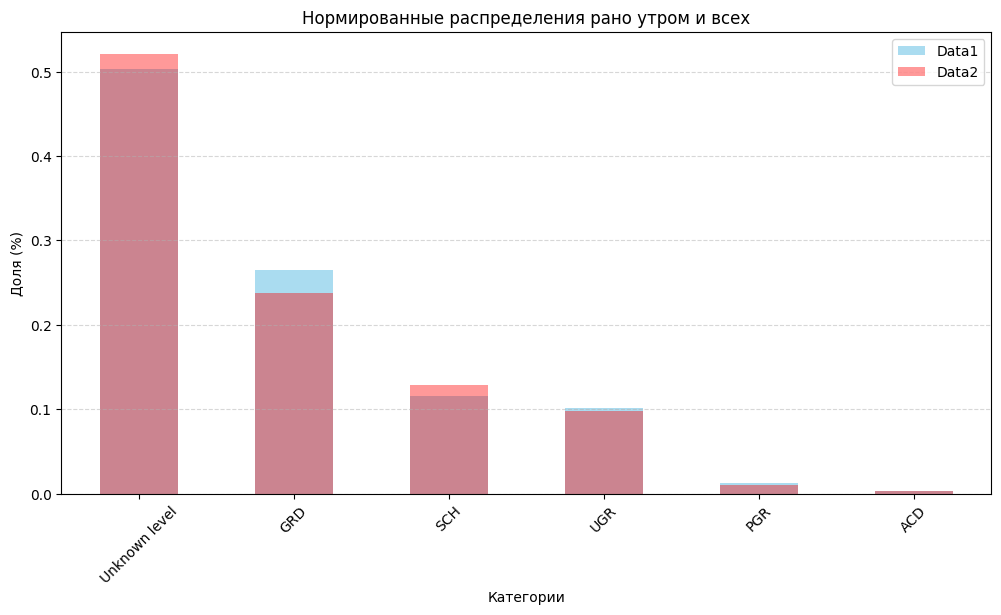

In [ ]:

data1 = df[df['hour_of_day'] == 5]['education_level_cd'].value_counts()  # Считаем частоту каждой категории
data2 = df['education_level_cd'].value_counts()


# Для нормировки
data1_norm = data1 / data1.sum()
data2_norm = data2 / data2.sum()

# Строим столбчатые диаграммы
plt.figure(figsize=(12, 6))
data1_norm.plot(kind='bar', color='skyblue', alpha=0.7, label='Data1')
data2_norm.plot(kind='bar', color='red', alpha=0.4, label='Data2')

plt.title('Нормированные распределения рано утром и всех')
plt.xlabel('Категории')
plt.ylabel('Доля (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Заметим, что распределение примерно такое же

Теперь посмотрим на форму распределения по возрасту для этих двух групп. Можно предположить, что сотрудники были бы более молодого возраста.

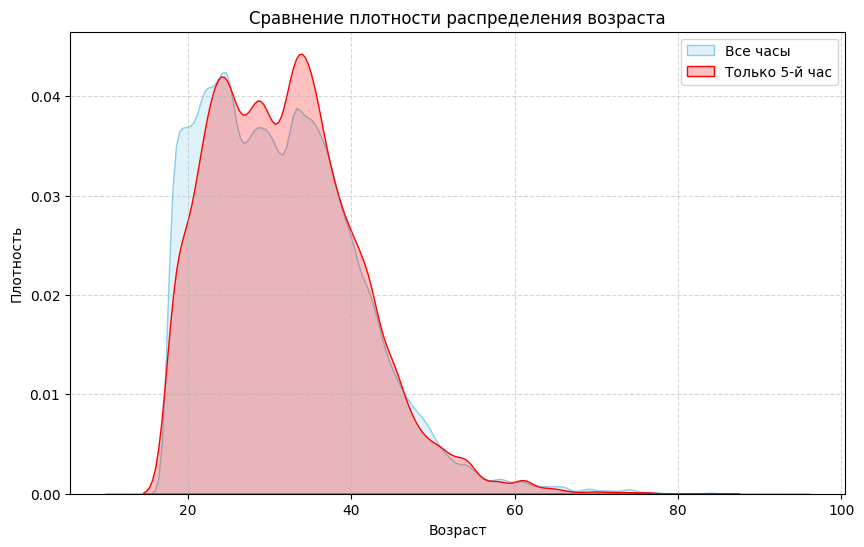

In [ ]:


# Выбираем данные
age_hour5 = df[df['hour_of_day'] == 5]['age']
age_all = df['age']

plt.figure(figsize=(10, 6))
sns.kdeplot(age_all, color='skyblue', label='Все часы', fill=True)
sns.kdeplot(age_hour5, color='red', label='Только 5-й час', fill=True)

plt.title('Сравнение плотности распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Заметим, что распределение почти такое же и скошено наоборот в сторону более старших пользователей

Итог: недостаточно данных для того, чтобы определеить, являются ли пользователи, испольщующие самокаты утром сотрудниками "Юрент". После уточнения этого вопроса у других отделов, в том случае, если окажется, что это не сотрудники, можно проводить дальнейшие исслеодванияи и  прорабоать идею "Ночного тарифа" для повышения уровня лояльности пользователей, нуждающихся в самокатах ранним утром. Ночные работники (курьеры, бармены, уборщики) — это неучтенная, но лояльная аудитория, готовая платить за удобство. Пик в 5 утра можно монетизировать через специальный тариф, адаптированный под их потребности.


## Анализ спроса по дням недели

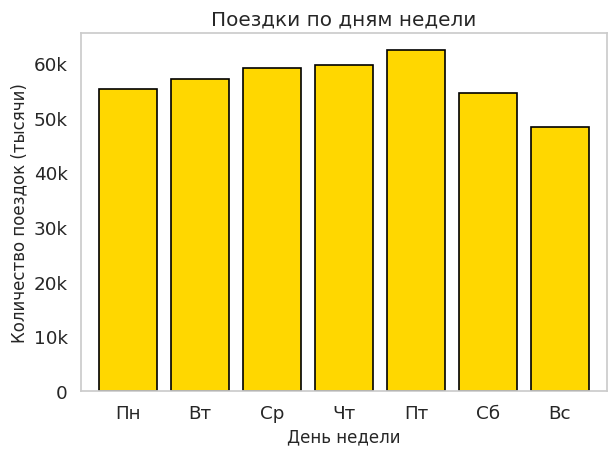

In [ ]:

from matplotlib.ticker import FuncFormatter

# ... (предыдущий код без изменений до визуализации)

# Визуализация
weekday_dist.plot(
    kind='bar',
    title='Поездки по дням недели',
    color='gold',
    edgecolor='black',
    linewidth=1.2,
    width=0.8
)

# Настройка осей и сетки
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Количество поездок (тысячи)', fontsize=12)  # Обновлённая подпись
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Форматирование оси Y в тысячах
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.tight_layout()
plt.grid(False)
plt.show()

Заметим, что в выходные спрос меньше чем в будние дни. Если бы львиной долей были люди использующие самокаты для доставки, то в выходные не было бы такой  просадки. Да и сущетсвует сервис "Юрент Курьер". Поэтому предполагаем, что такого сегмента в полученных данных нет

## Сегментация пользователей

Поскольку мы пришли к выводу о том, что данные о курьерах не представленны в датасете, постараемся выделить 2 сегмента: те, кто используют самокаты как средство передвижения и те, кто используют их для неспешной прогулки и отдыха.

Посмотрим на среднюю дистанцию каждого пользователя

In [ ]:
avg_distance_by_user = df.groupby('party_rk')['distance_km'].mean()
print(avg_distance_by_user.describe())

count    64052.000000
mean         4.467266
std         89.179910
min          0.000000
25%          1.215205
50%          2.047298
75%          3.429731
max      13629.192952
Name: distance_km, dtype: float64


Заметим, что std очень большое и max = 13629.192952. Это просто невозможно и скорее всего это баг. Возмем порог в средний километраж в 150 км

In [ ]:
avg_distance_by_user = df.groupby('party_rk')['distance_km'].mean()
print(avg_distance_by_user[avg_distance_by_user < 150].describe())

count    63995.000000
mean         3.054010
std          4.764207
min          0.000000
25%          1.214260
50%          2.045088
75%          3.424852
max        145.382249
Name: distance_km, dtype: float64


Теперь std стало приемлимым и можно продолжать работу

Визуализируем распределение дистанций поездок (менее 150 км)

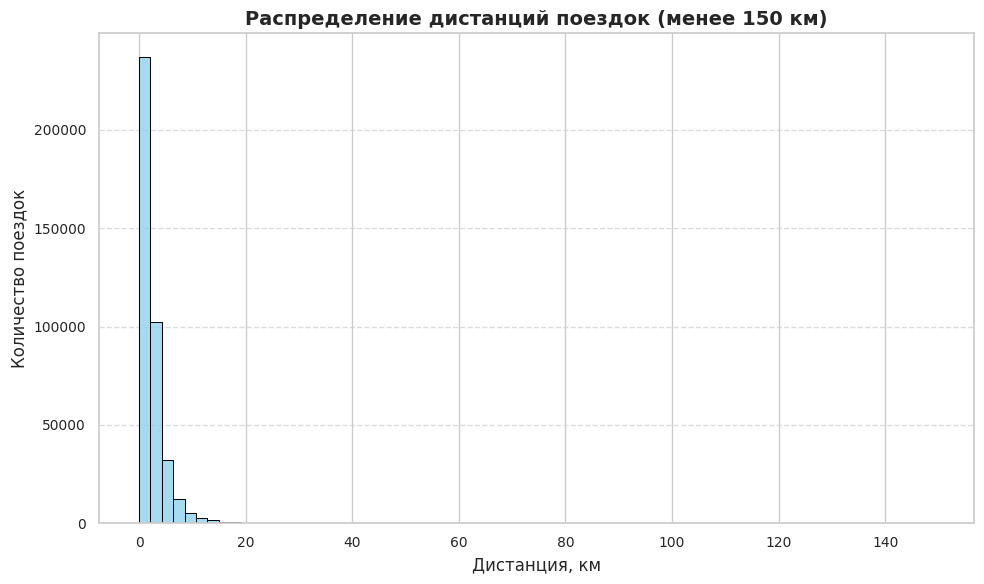

In [ ]:
sns.set(style='whitegrid')

# Фильтрация данных
filtered_data = df[df['distance_km'] < 150]['distance_km']

# Размер графика
plt.figure(figsize=(10, 6))

# Построение гистограммы с KDE
sns.histplot(filtered_data, bins=70, color='skyblue', edgecolor='black')

# Названия и стили
plt.title('Распределение дистанций поездок (менее 150 км)', fontsize=14, fontweight='bold')
plt.xlabel('Дистанция, км', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Подписи сетки и плотности
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Заметим, что распределение вполне логично и продолжим работу с данными

Для сегментации воспользуемся кластеризацией методом k-средних, т.к. мы заранее знаем кол-во кластеров (2)


Для кластеризации можно взять, например, две переменные:

**Частота поездок** и **Средняя скорость**: можно предположить, что пользователи, которые часто ездят с высокой скоростью, используют велосипед как средство передвижения.

In [ ]:
# Сначала создаём колонку с расчетной скоростью для каждой поездки
df['speed_kmph'] = df['distance_km'] / (df['trip_duration_in_minutes'] / 60)  # км/ч

# Рассчитаем частоту поездок
grouped_by_customer = df.groupby('party_rk').agg({
    'distance_km': 'count',      # это и есть частота — количество поездок
    'speed_kmph': 'mean'           # средняя скорость
}).rename(columns={
    'distance_km': 'trip_count',
    'speed_kmph': 'avg_speed_kmph'
})
grouped_by_customer

,trip_count,avg_speed_kmph
party_rk,,
14717,1,2.657073
15725,4,9.925172
22290,6,13.385900
22530,4,10.987596
27063,1,8.679055
...,...,...
1300448310,1,8.925189
1300455702,2,5.533104
1300625360,1,6.160401


По открытам данным, максимальная скорость самоката составляет 25 км/ч.

Значит будем работать только с такими данными

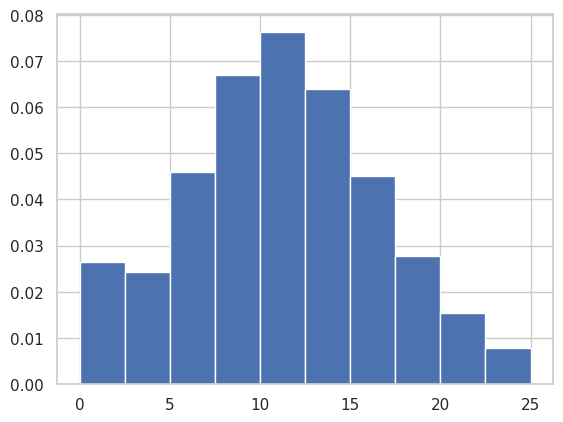

In [ ]:
plt.hist(grouped_by_customer[grouped_by_customer['avg_speed_kmph'] < 25]['avg_speed_kmph'],density=True);

Заметим, что мода - скорость около 10 км/ч, и распределение не сильно отклоняется от нормального

In [ ]:
# Работаем с этими данными
grouped_by_customer = grouped_by_customer[grouped_by_customer['avg_speed_kmph'] < 25]
grouped_by_customer

,trip_count,avg_speed_kmph
party_rk,,
14717,1,2.657073
15725,4,9.925172
22290,6,13.385900
22530,4,10.987596
27063,1,8.679055
...,...,...
1300448310,1,8.925189
1300455702,2,5.533104
1300625360,1,6.160401


In [ ]:
grouped_by_customer['trip_count'].describe()

,trip_count
count,62237.000000
mean,6.202564
std,13.722143
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,388.000000


Частота также выглядит вполне логично

In [ ]:
# Стандартизируем признаки перед кластеризацией
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped_by_customer)

# Кластеризация на 2 сегмента
kmeans = KMeans(n_clusters=2, random_state=42)
grouped_by_customer['cluster'] = kmeans.fit_predict(X_scaled)
grouped_by_customer

<ipython-input-54-8881b27f2986>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_by_customer['cluster'] = kmeans.fit_predict(X_scaled)


,trip_count,avg_speed_kmph,cluster
party_rk,,,
14717,1,2.657073,0
15725,4,9.925172,0
22290,6,13.385900,1
22530,4,10.987596,0
27063,1,8.679055,0
...,...,...,...
1300448310,1,8.925189,0
1300455702,2,5.533104,0
1300625360,1,6.160401,0


In [ ]:
grouped_by_customer['cluster'] = grouped_by_customer['cluster'].replace({
    0: 'Для прогулок',
    1: 'Для передвижения'
})
grouped_by_customer

<ipython-input-55-9e71ddc0665e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_by_customer['cluster'] = grouped_by_customer['cluster'].replace({


,trip_count,avg_speed_kmph,cluster
party_rk,,,
14717,1,2.657073,Для прогулок
15725,4,9.925172,Для прогулок
22290,6,13.385900,Для передвижения
22530,4,10.987596,Для прогулок
27063,1,8.679055,Для прогулок
...,...,...,...
1300448310,1,8.925189,Для прогулок
1300455702,2,5.533104,Для прогулок
1300625360,1,6.160401,Для прогулок


Визуализируем кластеризацию

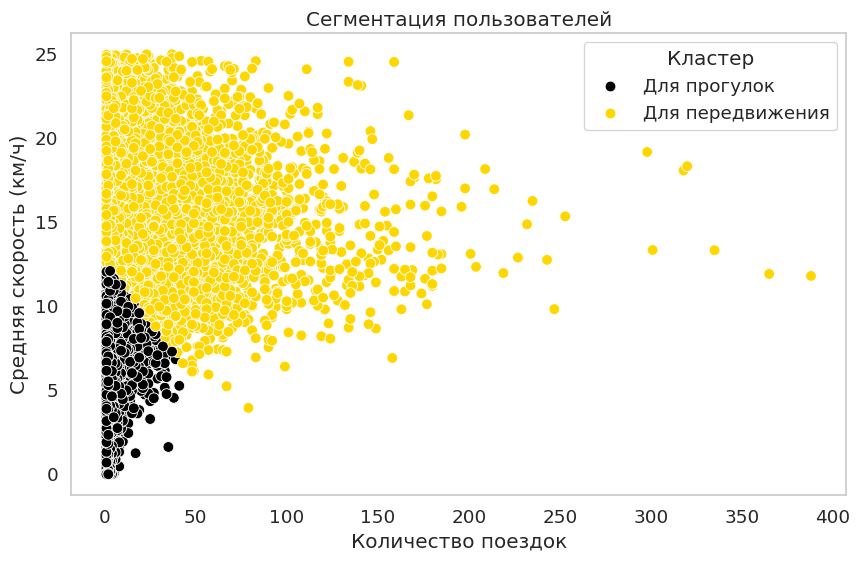

In [ ]:


# Задаём кастомные цвета для кластеров: 0 → чёрный, 1 → жёлтый
custom_palette = {'Для прогулок' : 'black', 'Для передвижения': 'gold'}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped_by_customer,
    x='trip_count',
    y='avg_speed_kmph',
    hue='cluster',
    palette=custom_palette,
    s=60
)

plt.title('Сегментация пользователей')
plt.xlabel('Количество поездок')
plt.ylabel('Средняя скорость (км/ч)')
plt.grid(False)
plt.legend(title='Кластер')
plt.show()


Черным цветом здесь помечен сегмент тех, кто исползует самокат для прогулки , а желтым - тех, кто использует их для передвижения

### Продуктовая гипотеза

Для пользователей, которые используют самокат для прогулки можно предложить в приложении готовые живописные маршруты (парки, набережные, достопримечательности) с указанием расстояния и времени.

Для пользователей, которые используют самокаты как транспортное средство, чтобы быстро добраться из точки А в точку Б, можно  предложить подписку с фиксированной ценой за определенное количество поездок в месяц (например, 20 поездок до 15 минут)

**Продуктовые гипотезы:**

1.   Если предложить в приложении готовые живописные маршруты (парки, набережные, достопримечательности) с указанием расстояния и времени, то пользователи будут чаще арендовать самокаты и проводить больше времени в поездках, что увеличит средний чек.

*Более конкретно:*


*   Внедрить в приложение раздел "Прогулочные маршруты" с готовыми маршрутами (например, "Набережная Москвы-реки, 5 км, 40 минут").

*   Добавить фильтры (например, "парки", "достопримечательности") и информацию о маршруте (фото, описание, уровень сложности).

*   Предложить возможность сохранить маршрут.

*Метрики успеха:*

*  Увеличение средней длительности поездки в сегменте "Для прогулок".
*  Рост числа аренд в районах с предложенными маршрутами.





2.   Если предложить подписку с фиксированной ценой за определенное количество поездок в месяц (например, 20 поездок до 15 минут), то это повысит лояльность и удержание пользователей, которые регулярно ездят на работу или учебу.

*Более конкретно:*


*   Ввести подписку, например, "20 поездок до 15 минут за 1500 рублей в месяц".
*   Гарантировать приоритетный доступ к самокатам для подписчиков в часы пик (например, через алгоритм резервирования).
*   Упростить процесс оплаты и активации поездки для подписчиков (например, автоматическое списание поездки из подписки).


*Метрики успеха:*

*  Увеличение Retention Rate (удержания) в сегменте "Для передвижения".
*  Рост доли пользователей, выбирающих подписку.








## Взаимосвязь образования и спроса на самокаты

Проверим данные о стоимости поездок на наличие выбросов

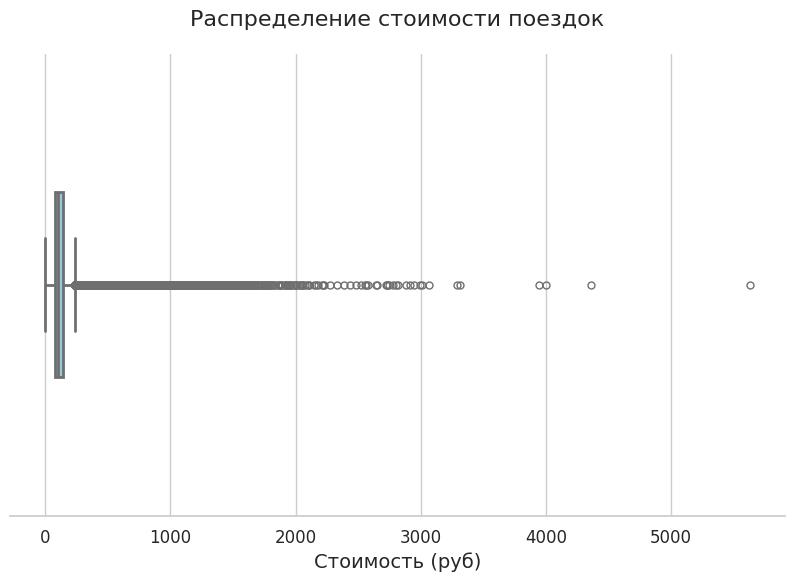

In [ ]:
# Настройка стиля
sns.set(style="whitegrid", font_scale=1.2)

# Создание боксплота
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['nominal_price_rub_amt'],
    color='skyblue',
    width=0.4,
    linewidth=2,
    fliersize=5  # Размер точек-выбросов
)

# Добавление заголовка и подписей
plt.title('Распределение стоимости поездок', pad=20, fontsize=16)
plt.xlabel('Стоимость (руб)', fontsize=14)
plt.xticks(fontsize=12)

# Удаление лишних элементов
sns.despine(left=True)

# Вывод графика
plt.show()

Заметим, что в даных есть большое число выбросов, поэтому будет анализировать спрос по кол-ву заказов в первую очередь.

In [ ]:
prob = df[['education_level_cd', 'age']].query("education_level_cd == 'UGR'")


In [ ]:


# Шаг 1: Считаем активность клиента (примеры метрик)
client_activity = df.groupby(['party_rk', 'education_level_cd'] , as_index=False).agg(
    total_rides=('order_rk', 'count'),         # Количество поездок
    total_spent=('nominal_price_rub_amt', 'sum')  # Сумма потраченных денег
)

client_activity
# Шаг 3: Группируем по образованию и считаем средние значения
education_demand = client_activity.groupby('education_level_cd').agg(
    avg_rides=('total_rides', 'mean'),    # Среднее число поездок
    avg_spent=('total_spent', 'mean')     # Средние траты
).reset_index()


education_demand

,education_level_cd,avg_rides,avg_spent
0,ACD,5.735931,774.149351
1,GRD,6.178597,798.096836
2,PGR,5.762619,754.243874
3,SCH,6.247472,798.953056
4,UGR,6.748092,846.778442
5,Unknown level,6.106417,776.661147


Сначала построим распределение по кол-ву поездок.

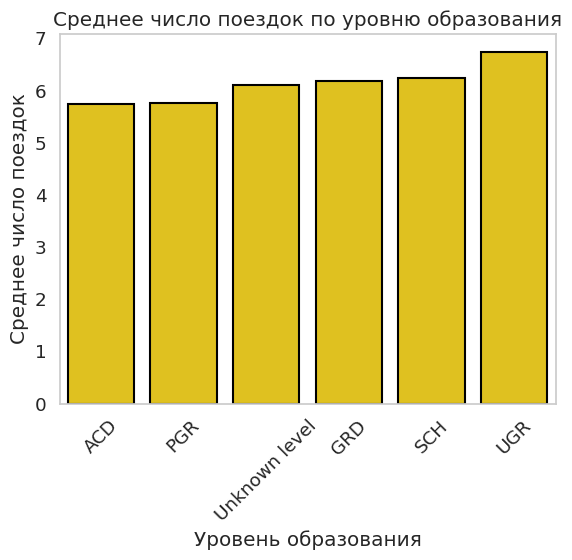

In [ ]:

education_demand_sorted = education_demand.sort_values('avg_rides', ascending=True)
sns.barplot(
    data=education_demand_sorted,
    x='education_level_cd',
    y='avg_rides',
    order=education_demand_sorted['education_level_cd'],
    color='gold',
    edgecolor='black',  # Чёрный контур
    linewidth=1.5
)
plt.xlabel('Уровень образования')
plt.ylabel('Среднее число поездок')
plt.title('Среднее число поездок по уровню образования')
plt.xticks(rotation=45)  # Наклон подписей для читаемости
plt.grid(False)
plt.show()


In [ ]:
from scipy.stats import f_oneway

groups = [group['total_rides'].values for name, group in client_activity.groupby('education_level_cd')]
f_oneway(*groups)

F_onewayResult(statistic=np.float64(2.384333504655532), pvalue=np.float64(0.03588874145480077))

Заметим, что pvalue меньше 0.05. Значит имеем основания отвергнуть гипотезу о различии статистически значимых различий в данных.

На всякий случай посмотрим на распределение средней цены поездки по уровню образования пользователя.

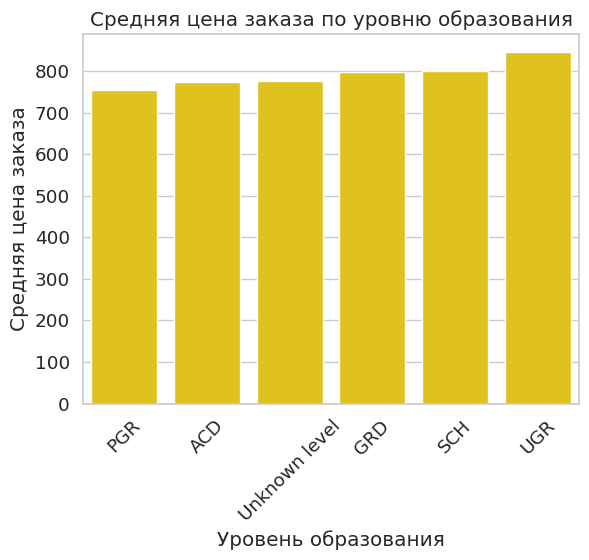

In [ ]:
education_demand_sorted = education_demand.sort_values('avg_spent', ascending=True)

sns.barplot(
    data=education_demand_sorted,
    x='education_level_cd',
    y='avg_spent',
    order=education_demand_sorted['education_level_cd'],
    color='gold'
)
plt.xlabel('Уровень образования')
plt.ylabel('Средняя цена заказа')
plt.title('Средняя цена заказа по уровню образования')
plt.xticks(rotation=45)
plt.show()

Однако и тут можно заметить, что клиенты с образованием UGR (незаконченное высшее) имеют наивысшие показатели.

Можно было бы принять UGR за студентов, но надо убедиться, что возраст тех у кого такое образование действительно соответствет возрасту студента

<ipython-input-86-90e90b3a6c9e>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x/1000) for x in current_values])


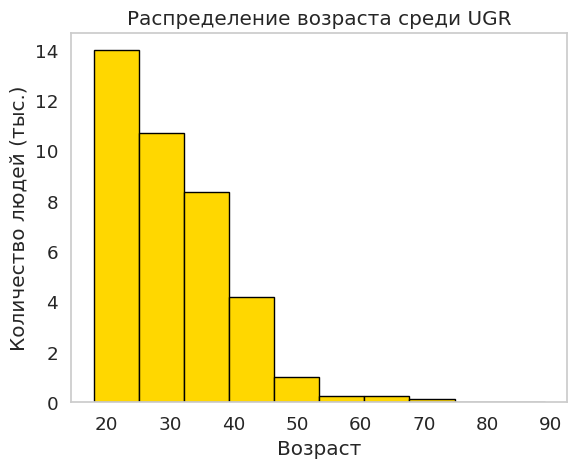

In [ ]:
# Построение гистограммы
plt.hist(
    df[['age', 'education_level_cd']].query("education_level_cd == 'UGR'")['age'],
    color='gold',
    edgecolor='black'
)

# Добавление подписей
plt.title('Распределение возраста среди UGR')
plt.xlabel('Возраст')
plt.ylabel('Количество людей (тыс.)')

# Изменение масштаба оси Y на тысячи
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x/1000) for x in current_values])

plt.grid(False)

# Показ графика
plt.show()

Заметим, что здесь не только студенты, но и большое кол-во людей, которые просто не окончили университет

### Продуктовая гипотеза

Учитывая, что пользователи с ученой степенью (ACD) и двумя высшими (PGR) менее активны из-за альтернативного транспорта или меньшей потребности в самокатах или из-за отстутствия иной мотивации.

**Гипотеза**: Если добавить в приложение счетчик “сэкономленного CO2” и программу лояльности с баллами для экологических проектов, то частота поездок среди пользователей ACD и PGR увеличится на 8–12% из-за того, что высокообразованные пользователи получат дополнительную мотивацию использовать самокаты как экологичное решение, соответствующее их ценностям.

*Метрики для проверки*:

*   Рост среднего числа поездок (avg_rides)
*   Увеличение доли активных пользователей
*   Рост поездок в деловых районах.

